In [1]:
import sys
import os
sys.path.append(os.path.abspath('../modules/'))
from modules import Removing_NA_cols

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

In [20]:
train = pd.read_csv('../data/train.csv')

C:\Users\samal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
rna = Removing_NA_cols(null_th=50)
rna.fit(train)
rna.transform(train)

Removing_NA_cols(null_th=50)

In [5]:
pd.options.display.max_columns = None

In [22]:
drop_cols = ['id','member_id','emp_title','title','zip_code','collections_12_mths_ex_med','policy_code','pymnt_plan','application_type','total_rev_hi_lim','tot_coll_amt']

In [23]:
train.drop(drop_cols,axis=1,inplace=True)

In [8]:
test=pd.read_csv('../data/test.csv')

C:\Users\samal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
train['next_pymnt_d'].fillna(value='NaN',inplace=True)

In [49]:
status_list = []
for i in  tqdm_notebook(range(len(train))):
    if train.iloc[i]['next_pymnt_d'] == 'NaN':
        status_list.append('closed')
    else:
        status_list.append('open')

C:\Users\samal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [32]:
test['next_pymnt_d'].fillna(value='NaN',inplace=True)

In [48]:
status_list_t = []
for i in  tqdm_notebook(range(len(test))):
    if test.iloc[i]['next_pymnt_d'] == 'NaN':
        status_list_t.append('closed')
    else:
        status_list_t.append('open')

C:\Users\samal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [50]:
train['loan_status'] = status_list
test['loan_status'] = status_list_t

In [37]:
import seaborn as sns

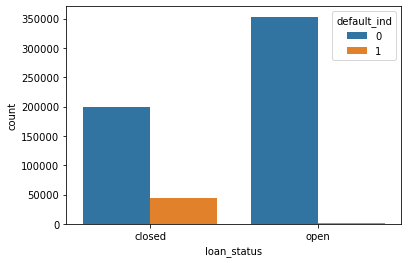

In [51]:
sns.countplot(x=train['loan_status'],hue=train['default_ind'])

* Exploring more using Cross tab

In [52]:
pd.crosstab(train['loan_status'],train['default_ind'],margins=True)

default_ind,0,1,All
loan_status,,,
closed,199688,44999,244687
open,353134,1157,354291
All,552822,46156,598978


In [53]:
44999/46156

0.9749328364676315

* out of total defaulters  loan status closed is about 97.5%
* out of total defaulters  loan status open is about 2.5%

In [54]:
1157/46159

0.0250655343486644

# inspecting loan_status 'open'

In [55]:
train[train['loan_status'] == 'open']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,other,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,0,open
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-2011,debt_consolidation,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,NaN,0,open
32,10000.0,10000.0,9975.0,60 months,15.96,242.97,C,C5,2 years,RENT,29120.0,Verified,Dec-2011,debt_consolidation,FL,22.83,0.0,Feb-1997,1.0,11.0,0.0,16158.0,63.6,31.0,f,2695.31,2688.53,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,Jan-2016,242.97,Jan-2016,Jan-2016,0.0,NaN,0,open
39,12500.0,12500.0,12475.0,60 months,12.69,282.44,B,B5,1 year,RENT,27000.0,Verified,Dec-2011,debt_consolidation,IL,16.04,0.0,Dec-2001,3.0,6.0,0.0,10143.0,50.0,24.0,f,3193.13,3186.72,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,Jan-2016,282.44,Jan-2016,Jan-2016,0.0,NaN,0,open
61,17500.0,8950.0,8925.0,60 months,17.27,223.74,D,D3,6 years,RENT,40000.0,Verified,Dec-2011,small_business,CA,19.47,0.0,May-2006,1.0,5.0,0.0,10724.0,58.9,6.0,f,2462.25,2455.34,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,Jan-2016,223.74,Jan-2016,Jan-2016,0.0,NaN,0,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,8 years,RENT,31000.0,Verified,Jan-2015,debt_consolidation,CA,28.69,0.0,Sep-2004,0.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,25274.0,0,open
855965,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,home_improvement,NJ,3.90,0.0,Mar-1974,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,140285.0,0,open
855966,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,5 years,RENT,35000.0,Verified,Jan-2015,debt_consolidation,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,34178.0,0,open
855967,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,1 year,RENT,64400.0,Source Verified,Jan-2015,debt_consolidation,MA,27.19,1.0,Oct-2003,2.0,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,0.0,58418.0,0,open


In [56]:
train[train['loan_status'] == 'open'][train[train['loan_status'] == 'open']['default_ind'] == 1]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status
318,18000.0,18000.0,17975.000000,60 months,17.27,449.97,D,D3,1 year,MORTGAGE,62000.0,Verified,Dec-2011,debt_consolidation,VA,7.82,0.0,Aug-1988,2.0,8.0,0.0,11273.0,86.7,30.0,f,6405.39,6396.45,19767.48,19740.11,11594.61,8172.87,0.0,0.0,0.0,Aug-2015,449.97,Feb-2016,Jan-2016,0.0,NaN,1,open
7590,21250.0,21250.0,21003.604048,60 months,14.27,497.43,C,C2,5 years,RENT,36000.0,Verified,Sep-2011,debt_consolidation,CA,21.07,0.0,Oct-1998,0.0,20.0,0.0,16753.0,40.9,25.0,f,5979.46,5972.37,23343.83,22895.16,15270.52,8073.31,0.0,0.0,0.0,Aug-2015,497.43,Feb-2016,Jan-2016,0.0,NaN,1,open
11709,5600.0,5600.0,5600.000000,60 months,15.99,136.16,D,D2,8 years,RENT,52416.0,Source Verified,Jul-2011,other,CA,19.78,0.0,Oct-2003,2.0,8.0,0.0,1258.0,28.6,13.0,f,1399.77,1399.77,6643.32,6643.32,4200.23,2443.09,0.0,0.0,0.0,Aug-2015,136.16,Feb-2016,Jan-2016,0.0,NaN,1,open
13383,15975.0,15975.0,15975.000000,60 months,20.99,432.09,E,E5,8 years,MORTGAGE,225000.0,Verified,Jun-2011,other,TX,5.71,0.0,Sep-1999,1.0,10.0,0.0,10852.0,80.5,27.0,f,3957.98,3957.98,21550.10,21550.10,12017.02,9533.08,0.0,0.0,0.0,Aug-2015,432.09,Feb-2016,Jan-2016,0.0,NaN,1,open
13799,5000.0,5000.0,5000.000000,60 months,15.99,121.57,D,D2,10+ years,RENT,65004.0,Source Verified,Jun-2011,other,CT,3.43,2.0,Nov-1996,1.0,15.0,1.0,2274.0,25.8,33.0,f,1147.65,1147.65,6048.10,6048.10,3852.35,2195.75,0.0,0.0,0.0,Aug-2015,121.57,Feb-2016,Jan-2016,0.0,NaN,1,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850140,15000.0,15000.0,15000.000000,60 months,11.44,329.44,B,B4,1 year,MORTGAGE,30000.0,Source Verified,Jan-2015,credit_card,MT,35.44,1.0,Aug-1981,0.0,26.0,0.0,19788.0,47.1,48.0,f,13657.00,13657.00,2359.05,2359.05,1343.00,1016.05,0.0,0.0,0.0,Aug-2015,329.44,Feb-2016,Jan-2016,0.0,19788.0,1,open
850364,6000.0,6000.0,6000.000000,36 months,11.44,197.69,B,B4,< 1 year,MORTGAGE,29000.0,Not Verified,Jan-2015,debt_consolidation,TX,20.28,0.0,May-2007,1.0,15.0,0.0,2659.0,33.2,28.0,f,4988.00,4988.00,1397.45,1397.45,1012.00,385.45,0.0,0.0,0.0,Aug-2015,197.69,Feb-2016,Jan-2016,0.0,215877.0,1,open
853239,21675.0,21675.0,21675.000000,60 months,18.54,556.79,E,E1,7 years,OWN,69000.0,Verified,Jan-2015,credit_card,CO,19.50,0.0,May-1994,2.0,6.0,0.0,8985.0,98.7,12.0,f,20047.74,20047.74,3852.88,3852.88,1627.26,2225.62,0.0,0.0,0.0,Aug-2015,556.79,Feb-2016,Jan-2016,0.0,202116.0,1,open
854981,8675.0,8675.0,8675.000000,36 months,17.86,313.02,D,D5,1 year,RENT,29000.0,Verified,Jan-2015,small_business,GA,23.84,1.0,Feb-2007,0.0,8.0,0.0,169.0,4.8,14.0,f,7330.10,7330.10,2173.92,2173.92,1344.90,829.02,0.0,0.0,0.0,Aug-2015,313.02,Feb-2016,Jan-2015,0.0,63031.0,1,open


In [57]:
train[train['loan_status'] == 'open'][train[train['loan_status'] == 'open']['default_ind'] == 0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,other,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,0,open
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-2011,debt_consolidation,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,NaN,0,open
32,10000.0,10000.0,9975.0,60 months,15.96,242.97,C,C5,2 years,RENT,29120.0,Verified,Dec-2011,debt_consolidation,FL,22.83,0.0,Feb-1997,1.0,11.0,0.0,16158.0,63.6,31.0,f,2695.31,2688.53,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,Jan-2016,242.97,Jan-2016,Jan-2016,0.0,NaN,0,open
39,12500.0,12500.0,12475.0,60 months,12.69,282.44,B,B5,1 year,RENT,27000.0,Verified,Dec-2011,debt_consolidation,IL,16.04,0.0,Dec-2001,3.0,6.0,0.0,10143.0,50.0,24.0,f,3193.13,3186.72,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,Jan-2016,282.44,Jan-2016,Jan-2016,0.0,NaN,0,open
61,17500.0,8950.0,8925.0,60 months,17.27,223.74,D,D3,6 years,RENT,40000.0,Verified,Dec-2011,small_business,CA,19.47,0.0,May-2006,1.0,5.0,0.0,10724.0,58.9,6.0,f,2462.25,2455.34,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,Jan-2016,223.74,Jan-2016,Jan-2016,0.0,NaN,0,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,8 years,RENT,31000.0,Verified,Jan-2015,debt_consolidation,CA,28.69,0.0,Sep-2004,0.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,25274.0,0,open
855965,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,home_improvement,NJ,3.90,0.0,Mar-1974,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,140285.0,0,open
855966,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,5 years,RENT,35000.0,Verified,Jan-2015,debt_consolidation,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,34178.0,0,open
855967,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,1 year,RENT,64400.0,Source Verified,Jan-2015,debt_consolidation,MA,27.19,1.0,Oct-2003,2.0,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,0.0,58418.0,0,open


* based on slice and diceing there might be a pattern in last_pymnt_d and next_pymnt_d
* inorder to it we need to convert these dates to date type

In [58]:
from sklearn.base import BaseEstimator,TransformerMixin
class conveting_to_date(BaseEstimator,TransformerMixin):
    def __init__(self,date_cols = None,sep_mnth_year = True):
        if date_cols == None:
            date_cols = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
            self.date_cols = date_cols
        else:
            self.date_cols = date_cols
        self.sep_mnth_year = sep_mnth_year
    def fit(self,df):
        return self
    def transform(self,df):
        for col in self.date_cols:
            df[col] = pd.to_datetime(df[col])
            if self.sep_mnth_year == True:
                df[f'{col}_year'], df[f'{col}_month'] = df[col].dt.year,df[col].dt.month
            else:
                pass
        return df

* copy train data so experiment can be done on the other one

In [59]:
tr_cp = train.copy()

In [61]:
cd = conveting_to_date(sep_mnth_year=False)

In [63]:
cd.fit_transform(tr_cp)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,credit_card,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,0,closed
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,closed
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,small_business,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,0,closed
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,other,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,0,closed
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,other,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,0,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,8 years,RENT,31000.0,Verified,2015-01-01,debt_consolidation,CA,28.69,0.0,2004-09-01,0.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,2016-01-01,332.10,2016-02-01,2016-01-01,0.0,25274.0,0,open
855965,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,10+ years,MORTGAGE,79000.0,Verified,2015-01-01,home_improvement,NJ,3.90,0.0,1974-03-01,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,2016-01-01,797.03,2016-02-01,2016-01-01,0.0,140285.0,0,open
855966,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,5 years,RENT,35000.0,Verified,2015-01-01,debt_consolidation,TN,30.90,0.0,2003-09-01,0.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,2016-01-01,316.07,2016-02-01,2016-01-01,0.0,34178.0,0,open
855967,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,1 year,RENT,64400.0,Source Verified,2015-01-01,debt_consolidation,MA,27.19,1.0,2003-10-01,2.0,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,0.00,2016-01-01,317.86,2016-02-01,2016-01-01,0.0,58418.0,0,open


* we have converted it to date time

In [128]:
tr_cp['last_next_diff']=(round((tr_cp['next_pymnt_d']- tr_cp['last_pymnt_d'])/np.timedelta64(1, 'M')))

In [130]:
tr_cp['last_next_diff'].isna().sum()

244687

* there are na values in las_next_diff column
* we need to impute it 
* we can impute it using a constant 0

In [132]:
tr_cp['last_next_diff'].fillna(value=0,inplace=True)

In [133]:
tr_cp[tr_cp['loan_status'] == 'open'][tr_cp[tr_cp['loan_status'] == 'open']['last_next_diff'] > 3]['default_ind'].value_counts()

1    1151
Name: default_ind, dtype: int64

* yes there is a pattern we can clearly see that there are only ones if a persons last payment date exceeds more than three months then he is more likely to be being default
* only 6 cases are not default
* this might be cause imputing with zero

# checking closed status

In [134]:
tr_cp[tr_cp['loan_status'] == 'closed']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status,last_next_diff
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,credit_card,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,0,closed,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,closed,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,small_business,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,0,closed,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,other,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,0,closed,0.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,wedding,AZ,11.20,0.0,2004-11-01,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,NaT,2015-09-01,0.0,NaN,0,closed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855941,4200.0,4200.0,4200.0,36 months,15.99,147.64,D,D2,10+ years,MORTGAGE,48000.0,Verified,2015-01-01,medical,CO,36.93,0.0,1990-08-01,0.0,13.0,0.0,12943.0,63.4,45.0,f,0.0,0.0,1026.020000,1026.02,667.96,358.06,0.00,0.00,0.00,2015-08-01,147.64,NaT,2016-01-01,0.0,207975.0,1,closed,0.0
855954,10775.0,10775.0,10775.0,36 months,6.03,327.95,A,A1,< 1 year,RENT,54000.0,Not Verified,2015-01-01,debt_consolidation,FL,13.22,1.0,1975-11-01,0.0,9.0,0.0,10776.0,25.8,21.0,w,0.0,0.0,11071.870000,11071.87,10775.00,296.87,0.00,0.00,0.00,2015-07-01,9439.34,NaT,2015-06-01,0.0,24696.0,0,closed,0.0
855956,6225.0,6225.0,6225.0,36 months,16.49,220.37,D,D3,2 years,RENT,27000.0,Source Verified,2015-01-01,debt_consolidation,FL,18.58,0.0,2011-02-01,1.0,3.0,0.0,1756.0,97.6,4.0,f,0.0,0.0,7050.460000,7050.46,6225.00,825.46,0.00,0.00,0.00,2015-12-01,4858.17,NaT,2015-12-01,0.0,8357.0,0,closed,0.0
855959,4000.0,4000.0,4000.0,36 months,8.67,126.59,B,B1,10+ years,MORTGAGE,50000.0,Verified,2015-01-01,car,CA,12.63,0.0,2002-09-01,0.0,11.0,1.0,1700.0,5.6,30.0,f,0.0,0.0,4158.020000,4158.02,4000.00,158.02,0.00,0.00,0.00,2015-06-01,3655.51,NaT,2015-11-01,0.0,18979.0,0,closed,0.0


* status is closed beacause if the person has complted his term or else the person has defaulted so tat there will be no next paymnet date
* so we need to check funded amount and total principal amount recoved 

In [138]:
tr_cp[['funded_amnt','total_rec_prncp','default_ind','loan_status']]

,funded_amnt,total_rec_prncp,default_ind,loan_status
0,5000.0,5000.00,0,closed
1,2500.0,456.46,1,closed
2,2400.0,2400.00,0,closed
3,10000.0,10000.00,0,closed
4,3000.0,2233.10,0,open
...,...,...,...,...
855964,10000.0,2944.53,0,open
855965,24000.0,7066.74,0,open
855966,13000.0,1844.50,0,open
855967,12000.0,1552.69,0,open


* there might be pattern here

In [140]:
tr_cp['pending_amount']=tr_cp['funded_amnt'] - tr_cp['total_rec_prncp']

* Now checking loan with closed status and pending amount

In [151]:
tr_cp[tr_cp['loan_status'] == 'closed'][tr_cp[tr_cp['loan_status'] == 'closed']['pending_amount'] > 2]['default_ind'].value_counts()

1    44999
0      433
Name: default_ind, dtype: int64

* all 44999 defaulters are the persons whos principle amount is pending
* but there 433 non defauters that are also pending
* need further more exploring

* coping pendimg amount people greater than 2 and Explore it 

In [155]:
pending=tr_cp[tr_cp['loan_status'] == 'closed'][tr_cp[tr_cp['loan_status'] == 'closed']['pending_amount'] > 2]

In [159]:
pending[pending['default_ind'] == 0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status,last_next_diff,pending_amount
793,16000.0,16000.0,15975.000000,60 months,17.27,399.97,D,D3,4 years,MORTGAGE,60000.0,Verified,2011-12-01,credit_card,CA,11.98,0.0,2005-07-01,1.0,8.0,0.0,19626.0,80.8,13.0,f,0.0,0.0,19173.08,19143.21,11608.49,7564.59,0.0,0.0,0.0,2016-01-01,4824.69,NaT,2016-01-01,0.0,NaN,0,closed,0.0,4391.51
2940,4000.0,4000.0,4000.000000,60 months,20.30,106.65,E,E5,10+ years,OWN,55000.0,Source Verified,2011-11-01,home_improvement,WA,4.67,0.0,1999-01-01,1.0,6.0,0.0,5343.0,60.7,9.0,f,0.0,0.0,6015.97,6015.97,3832.36,2183.61,0.0,0.0,0.0,2016-01-01,271.64,NaT,2016-01-01,0.0,NaN,0,closed,0.0,167.64
7631,4200.0,4200.0,4200.000000,60 months,16.49,103.24,D,D3,2 years,RENT,50004.0,Verified,2011-09-01,major_purchase,NY,14.52,0.0,2006-09-01,0.0,4.0,0.0,900.0,50.0,8.0,f,0.0,0.0,5966.48,5966.48,4191.15,1775.33,0.0,0.0,0.0,2015-12-01,641.59,NaT,2016-01-01,0.0,NaN,0,closed,0.0,8.85
8952,13250.0,13250.0,11839.517934,60 months,16.49,325.68,D,D3,1 year,RENT,38400.0,Not Verified,2011-08-01,debt_consolidation,CA,23.66,1.0,2004-12-01,0.0,9.0,0.0,12201.0,81.5,18.0,f,0.0,0.0,16924.92,13960.68,10793.44,6131.48,0.0,0.0,0.0,2016-01-01,2796.84,NaT,2016-01-01,0.0,NaN,0,closed,0.0,2456.56
12790,18225.0,18225.0,18200.000000,60 months,13.99,423.97,C,C3,6 years,MORTGAGE,48000.0,Verified,2011-06-01,debt_consolidation,OH,26.21,0.0,1984-04-01,1.0,9.0,0.0,9909.0,36.7,23.0,f,0.0,0.0,22878.88,22847.52,15772.63,7106.25,0.0,0.0,0.0,2016-01-01,2881.33,NaT,2016-01-01,0.0,NaN,0,closed,0.0,2452.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849532,15000.0,15000.0,15000.000000,60 months,15.59,361.52,D,D1,8 years,MORTGAGE,40000.0,Source Verified,2015-01-01,debt_consolidation,NC,27.45,0.0,2005-06-01,0.0,8.0,0.0,7643.0,45.8,21.0,w,0.0,0.0,4312.26,4312.26,2149.00,2163.26,0.0,0.0,0.0,2016-01-01,13312.70,NaT,2016-01-01,0.0,32078.0,0,closed,0.0,12851.00
850262,6000.0,6000.0,6000.000000,36 months,14.31,205.98,C,C4,NaN,MORTGAGE,36500.0,Verified,2015-01-01,debt_consolidation,GA,20.12,1.0,1999-11-01,1.0,7.0,1.0,3299.0,55.0,26.0,f,0.0,0.0,2462.22,2462.22,1723.28,738.94,0.0,0.0,0.0,2016-01-01,4511.60,NaT,2016-01-01,0.0,139305.0,0,closed,0.0,4276.72
852482,14000.0,14000.0,13950.000000,60 months,8.67,288.38,B,B1,10+ years,MORTGAGE,85000.0,Source Verified,2015-01-01,debt_consolidation,VA,19.33,0.0,1989-08-01,0.0,8.0,0.0,25425.0,82.0,34.0,f,0.0,0.0,3447.07,3434.76,2338.23,1108.84,0.0,0.0,0.0,2016-01-01,11997.90,NaT,2016-01-01,0.0,265388.0,0,closed,0.0,11661.77
853419,35000.0,35000.0,35000.000000,60 months,12.39,785.48,C,C1,10+ years,RENT,100000.0,Verified,2015-01-01,debt_consolidation,CA,25.68,0.0,1992-11-01,1.0,22.0,0.0,81310.0,31.7,25.0,f,0.0,0.0,9377.58,9377.58,5388.45,3989.13,0.0,0.0,0.0,2016-01-01,30570.29,NaT,2016-01-01,0.0,105003.0,0,closed,0.0,29611.55


In [160]:
pending[pending['default_ind'] == 1]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status,last_next_diff,pending_amount
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,closed,0.0,2043.54
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,small_business,CA,5.55,0.0,2004-04-01,2.0,11.0,0.0,5210.0,32.6,13.0,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,2012-04-01,152.39,NaT,2012-08-01,0.0,NaN,1,closed,0.0,5437.98
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12-01,other,TX,18.08,0.0,2004-09-01,0.0,2.0,0.0,9279.0,36.5,3.0,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,2012-11-01,121.45,NaT,2013-03-01,0.0,NaN,1,closed,0.0,4701.52
12,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,2011-12-01,debt_consolidation,VA,10.08,0.0,2004-04-01,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,2012-07-01,305.38,NaT,2012-11-01,0.0,NaN,1,closed,0.0,7743.86
14,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,2011-12-01,other,CA,7.06,0.0,1991-05-01,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,2013-10-01,325.74,NaT,2014-03-01,0.0,NaN,1,closed,0.0,4566.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855896,12000.0,12000.0,12000.0,36 months,17.86,432.99,D,D5,9 years,RENT,42000.0,Verified,2015-01-01,debt_consolidation,NC,26.74,1.0,2001-09-01,0.0,7.0,0.0,1294.0,34.1,21.0,w,0.0,0.0,3007.12,3007.12,1862.24,1144.88,0.0,0.00,0.0000,2015-08-01,432.99,NaT,2016-01-01,0.0,51882.0,1,closed,0.0,10137.76
855901,2725.0,2725.0,2725.0,36 months,17.86,98.33,D,D5,NaN,MORTGAGE,47784.0,Verified,2015-01-01,debt_consolidation,FL,14.69,1.0,2001-12-01,1.0,10.0,1.0,1963.0,33.8,18.0,f,0.0,0.0,590.89,590.89,359.21,231.68,0.0,0.00,0.0000,2015-07-01,98.33,NaT,2016-01-01,0.0,162837.0,1,closed,0.0,2365.79
855922,14000.0,14000.0,14000.0,36 months,15.99,492.13,D,D2,5 years,MORTGAGE,69000.0,Verified,2015-01-01,home_improvement,FL,8.23,0.0,2003-11-01,0.0,9.0,0.0,7755.0,64.1,15.0,f,0.0,0.0,3420.04,3420.04,2226.49,1193.55,0.0,0.00,0.0000,2015-08-01,492.13,NaT,2016-01-01,0.0,22279.0,1,closed,0.0,11773.51
855941,4200.0,4200.0,4200.0,36 months,15.99,147.64,D,D2,10+ years,MORTGAGE,48000.0,Verified,2015-01-01,medical,CO,36.93,0.0,1990-08-01,0.0,13.0,0.0,12943.0,63.4,45.0,f,0.0,0.0,1026.02,1026.02,667.96,358.06,0.0,0.00,0.0000,2015-08-01,147.64,NaT,2016-01-01,0.0,207975.0,1,closed,0.0,3532.04


* there might be pattern in installment and last payment amount
* thsi might be possible beacause they might have payed hight amount of on base installment inored to stop from getting default
* to confirm this we no generate a feature that they have payed more amount on ther base installment

In [192]:
pending['amount_over_payed']=pending['installment'] - pending['last_pymnt_amnt']

In [201]:
pending[pending['amount_over_payed'] < 0]['default_ind'].value_counts()

1    3565
0     402
Name: default_ind, dtype: int64

* from total 433 non defaulters 402 have payed more than their base amount
* out of 44999 defaulters 3565 people have payed less tha their base amount

In [208]:
pending[pending['amount_over_payed'] < 0][pending[pending['amount_over_payed'] < 0]['default_ind'] == 0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status,last_next_diff,pending_amount,over_payed_times,amount_over_payed
793,16000.0,16000.0,15975.000000,60 months,17.27,399.97,D,D3,4 years,MORTGAGE,60000.0,Verified,2011-12-01,credit_card,CA,11.98,0.0,2005-07-01,1.0,8.0,0.0,19626.0,80.8,13.0,f,0.0,0.0,19173.08,19143.21,11608.49,7564.59,0.0,0.0,0.0,2016-01-01,4824.69,NaT,2016-01-01,0.0,NaN,0,closed,0.0,4391.51,12.1,-4424.72
2940,4000.0,4000.0,4000.000000,60 months,20.30,106.65,E,E5,10+ years,OWN,55000.0,Source Verified,2011-11-01,home_improvement,WA,4.67,0.0,1999-01-01,1.0,6.0,0.0,5343.0,60.7,9.0,f,0.0,0.0,6015.97,6015.97,3832.36,2183.61,0.0,0.0,0.0,2016-01-01,271.64,NaT,2016-01-01,0.0,NaN,0,closed,0.0,167.64,2.5,-164.99
7631,4200.0,4200.0,4200.000000,60 months,16.49,103.24,D,D3,2 years,RENT,50004.0,Verified,2011-09-01,major_purchase,NY,14.52,0.0,2006-09-01,0.0,4.0,0.0,900.0,50.0,8.0,f,0.0,0.0,5966.48,5966.48,4191.15,1775.33,0.0,0.0,0.0,2015-12-01,641.59,NaT,2016-01-01,0.0,NaN,0,closed,0.0,8.85,6.2,-538.35
8952,13250.0,13250.0,11839.517934,60 months,16.49,325.68,D,D3,1 year,RENT,38400.0,Not Verified,2011-08-01,debt_consolidation,CA,23.66,1.0,2004-12-01,0.0,9.0,0.0,12201.0,81.5,18.0,f,0.0,0.0,16924.92,13960.68,10793.44,6131.48,0.0,0.0,0.0,2016-01-01,2796.84,NaT,2016-01-01,0.0,NaN,0,closed,0.0,2456.56,8.6,-2471.16
12790,18225.0,18225.0,18200.000000,60 months,13.99,423.97,C,C3,6 years,MORTGAGE,48000.0,Verified,2011-06-01,debt_consolidation,OH,26.21,0.0,1984-04-01,1.0,9.0,0.0,9909.0,36.7,23.0,f,0.0,0.0,22878.88,22847.52,15772.63,7106.25,0.0,0.0,0.0,2016-01-01,2881.33,NaT,2016-01-01,0.0,NaN,0,closed,0.0,2452.37,6.8,-2457.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849532,15000.0,15000.0,15000.000000,60 months,15.59,361.52,D,D1,8 years,MORTGAGE,40000.0,Source Verified,2015-01-01,debt_consolidation,NC,27.45,0.0,2005-06-01,0.0,8.0,0.0,7643.0,45.8,21.0,w,0.0,0.0,4312.26,4312.26,2149.00,2163.26,0.0,0.0,0.0,2016-01-01,13312.70,NaT,2016-01-01,0.0,32078.0,0,closed,0.0,12851.00,36.8,-12951.18
850262,6000.0,6000.0,6000.000000,36 months,14.31,205.98,C,C4,NaN,MORTGAGE,36500.0,Verified,2015-01-01,debt_consolidation,GA,20.12,1.0,1999-11-01,1.0,7.0,1.0,3299.0,55.0,26.0,f,0.0,0.0,2462.22,2462.22,1723.28,738.94,0.0,0.0,0.0,2016-01-01,4511.60,NaT,2016-01-01,0.0,139305.0,0,closed,0.0,4276.72,21.9,-4305.62
852482,14000.0,14000.0,13950.000000,60 months,8.67,288.38,B,B1,10+ years,MORTGAGE,85000.0,Source Verified,2015-01-01,debt_consolidation,VA,19.33,0.0,1989-08-01,0.0,8.0,0.0,25425.0,82.0,34.0,f,0.0,0.0,3447.07,3434.76,2338.23,1108.84,0.0,0.0,0.0,2016-01-01,11997.90,NaT,2016-01-01,0.0,265388.0,0,closed,0.0,11661.77,41.6,-11709.52
853419,35000.0,35000.0,35000.000000,60 months,12.39,785.48,C,C1,10+ years,RENT,100000.0,Verified,2015-01-01,debt_consolidation,CA,25.68,0.0,1992-11-01,1.0,22.0,0.0,81310.0,31.7,25.0,f,0.0,0.0,9377.58,9377.58,5388.45,3989.13,0.0,0.0,0.0,2016-01-01,30570.29,NaT,2016-01-01,0.0,105003.0,0,closed,0.0,29611.55,38.9,-29784.81


In [209]:
pending[pending['amount_over_payed'] < 0][pending[pending['amount_over_payed'] < 0]['default_ind'] == 1]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status,last_next_diff,pending_amount,over_payed_times,amount_over_payed
1,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.1100,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,closed,0.0,2043.54,2.0,-59.83
120,25000.0,25000.0,23088.161058,60 months,13.49,575.12,C,C1,10+ years,MORTGAGE,67000.0,Verified,2011-12-01,credit_card,AK,14.15,0.0,1999-08-01,0.0,6.0,0.0,15319.0,91.2,21.0,f,0.0,0.0,23880.65,20309.60,13833.20,8008.11,28.76,2010.58,361.9044,2015-03-01,1179.00,NaT,2015-07-01,0.0,NaN,1,closed,0.0,11166.80,2.1,-603.88
121,19750.0,19750.0,19725.000000,36 months,10.65,643.33,B,B2,4 years,RENT,45000.0,Verified,2011-12-01,debt_consolidation,OR,22.80,0.0,2000-09-01,0.0,12.0,0.0,16576.0,54.2,28.0,f,0.0,0.0,11930.65,11915.62,8590.58,2698.78,0.00,641.29,6.4129,2013-09-01,787.01,NaT,2013-11-01,0.0,NaN,1,closed,0.0,11159.42,1.2,-143.68
177,20000.0,20000.0,20000.000000,60 months,20.89,539.84,F,F1,6 years,RENT,70000.0,Source Verified,2011-12-01,debt_consolidation,FL,16.63,0.0,2002-11-01,1.0,10.0,0.0,10470.0,79.9,24.0,f,0.0,0.0,5425.96,5425.96,1318.27,3034.08,0.00,1073.61,10.4800,2012-10-01,591.09,NaT,2013-02-01,0.0,NaN,1,closed,0.0,18681.73,1.1,-51.25
255,10000.0,10000.0,10000.000000,36 months,12.42,334.16,B,B4,10+ years,RENT,39000.0,Source Verified,2011-12-01,credit_card,MO,18.31,0.0,1998-08-01,1.0,7.0,0.0,11691.0,90.6,19.0,f,0.0,0.0,11604.88,11604.88,9635.96,1956.90,0.00,12.02,0.0000,2014-04-01,4378.02,NaT,2016-01-01,0.0,NaN,1,closed,0.0,364.04,13.1,-4043.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853906,35000.0,35000.0,35000.000000,60 months,25.57,1039.03,F,F5,7 years,MORTGAGE,177000.0,Verified,2015-01-01,home_improvement,NC,26.10,3.0,1995-05-01,1.0,13.0,1.0,1470.0,63.9,43.0,f,0.0,0.0,4576.20,4576.20,1003.86,3572.34,0.00,0.00,0.0000,2015-06-01,1558.55,NaT,2015-12-01,0.0,197824.0,1,closed,0.0,33996.14,1.5,-519.52
853988,14300.0,14300.0,14300.000000,36 months,20.99,538.69,E,E4,1 year,MORTGAGE,60000.0,Source Verified,2015-01-01,other,CA,12.40,0.0,2009-04-01,2.0,6.0,0.0,3369.0,43.8,10.0,f,0.0,0.0,3598.26,3598.26,577.12,466.91,26.93,2527.30,454.9140,2015-03-01,1104.31,NaT,2015-08-01,0.0,285623.0,1,closed,0.0,13722.88,2.0,-565.62
854713,25250.0,25250.0,25250.000000,36 months,15.59,882.62,D,D1,10+ years,MORTGAGE,55000.0,Verified,2015-01-01,home_improvement,OH,12.72,0.0,2003-05-01,0.0,8.0,0.0,12382.0,91.0,12.0,f,0.0,0.0,4413.49,4413.49,2845.89,1523.47,44.13,0.00,0.0000,2015-07-01,926.75,NaT,2015-12-01,0.0,198854.0,1,closed,0.0,22404.11,1.0,-44.13
854916,6000.0,6000.0,6000.000000,36 months,17.14,214.34,D,D4,1 year,RENT,20000.0,Source Verified,2015-01-01,credit_card,TX,36.85,0.0,2003-02-01,0.0,8.0,0.0,4789.0,87.1,11.0,f,0.0,0.0,1503.95,1503.95,938.02,550.93,15.00,0.00,0.0000,2015-08-01,443.68,NaT,2016-01-01,0.0,41116.0,1,closed,0.0,5061.98,2.1,-229.34


* if we look at the data we can vlearly see that the non defaulters pending amount is almost equal to the over payed fee

In [212]:
pending

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,tot_cur_bal,default_ind,loan_status,last_next_diff,pending_amount,over_payed_times,amount_over_payed
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,closed,0.0,2043.54,2.0,-59.83
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,small_business,CA,5.55,0.0,2004-04-01,2.0,11.0,0.0,5210.0,32.6,13.0,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,2012-04-01,152.39,NaT,2012-08-01,0.0,NaN,1,closed,0.0,5437.98,1.0,0.00
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12-01,other,TX,18.08,0.0,2004-09-01,0.0,2.0,0.0,9279.0,36.5,3.0,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,2012-11-01,121.45,NaT,2013-03-01,0.0,NaN,1,closed,0.0,4701.52,1.0,0.00
12,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,2011-12-01,debt_consolidation,VA,10.08,0.0,2004-04-01,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,2012-07-01,305.38,NaT,2012-11-01,0.0,NaN,1,closed,0.0,7743.86,1.0,0.00
14,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,2011-12-01,other,CA,7.06,0.0,1991-05-01,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,2013-10-01,325.74,NaT,2014-03-01,0.0,NaN,1,closed,0.0,4566.53,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855896,12000.0,12000.0,12000.0,36 months,17.86,432.99,D,D5,9 years,RENT,42000.0,Verified,2015-01-01,debt_consolidation,NC,26.74,1.0,2001-09-01,0.0,7.0,0.0,1294.0,34.1,21.0,w,0.0,0.0,3007.12,3007.12,1862.24,1144.88,0.0,0.00,0.0000,2015-08-01,432.99,NaT,2016-01-01,0.0,51882.0,1,closed,0.0,10137.76,1.0,0.00
855901,2725.0,2725.0,2725.0,36 months,17.86,98.33,D,D5,NaN,MORTGAGE,47784.0,Verified,2015-01-01,debt_consolidation,FL,14.69,1.0,2001-12-01,1.0,10.0,1.0,1963.0,33.8,18.0,f,0.0,0.0,590.89,590.89,359.21,231.68,0.0,0.00,0.0000,2015-07-01,98.33,NaT,2016-01-01,0.0,162837.0,1,closed,0.0,2365.79,1.0,0.00
855922,14000.0,14000.0,14000.0,36 months,15.99,492.13,D,D2,5 years,MORTGAGE,69000.0,Verified,2015-01-01,home_improvement,FL,8.23,0.0,2003-11-01,0.0,9.0,0.0,7755.0,64.1,15.0,f,0.0,0.0,3420.04,3420.04,2226.49,1193.55,0.0,0.00,0.0000,2015-08-01,492.13,NaT,2016-01-01,0.0,22279.0,1,closed,0.0,11773.51,1.0,0.00
855941,4200.0,4200.0,4200.0,36 months,15.99,147.64,D,D2,10+ years,MORTGAGE,48000.0,Verified,2015-01-01,medical,CO,36.93,0.0,1990-08-01,0.0,13.0,0.0,12943.0,63.4,45.0,f,0.0,0.0,1026.02,1026.02,667.96,358.06,0.0,0.00,0.0000,2015-08-01,147.64,NaT,2016-01-01,0.0,207975.0,1,closed,0.0,3532.04,1.0,0.00


In [215]:
pending['amount_diff']=pending['amount_over_payed'] + pending['pending_amount']

* generating new features that might be important like taking amount of percent pending and amount of timr installment over payed

In [229]:
pending['over_payed_times'] = round(pending['last_pymnt_amnt']/pending['installment'],2)

In [226]:
pending['pending_amount_percent'] = round(pending['total_rec_prncp']/pending['funded_amnt'],2)*100

* now cheking using ML algorith to see hidden patterns with generated feature and some sample fatures

In [230]:
pending.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'acc_now_delinq', 'tot_cur_bal', 'default_ind', 'loan_status',
       'last_next_diff', 'pending_amount', 'over_payed_times',
       'amount_over_payed', 'amount_diff', 'pending_amount_percent'],
      dtype='object')

In [232]:
fets = ['funded_amnt','installment','total_rec_prncp','last_next_diff', 'pending_amount', 'over_payed_times','amount_over_payed', 'amount_diff', 'pending_amount_percent']

In [235]:
X=pending[fets]

In [236]:
y = pending['default_ind']

In [237]:
from lightgbm import LGBMClassifier

In [323]:
lgb = LGBMClassifier(boosting_type='dart',n_estimators=1000)

In [239]:
lgb.fit(X,y)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [240]:
from sklearn.metrics import classification_report

In [241]:
print(classification_report(lgb.predict(X),y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00     44999

    accuracy                           1.00     45432
   macro avg       1.00      1.00      1.00     45432
weighted avg       1.00      1.00      1.00     45432



* wow f1_score is 100 we need to cross valiadate to confirm or we nned to check we there its over fitting or not

In [242]:
from sklearn.model_selection import cross_validate

In [243]:
cross_validate(lgb,X,y,scoring=(['f1','precision','recall']))

{'fit_time': array([3.10699058, 3.77583623, 3.25803041, 3.149297  , 2.86637425]),
 'score_time': array([0.07810378, 0.08051372, 0.07810545, 0.0624845 , 0.07601142]),
 'test_f1': array([0.99844444, 0.9978373 , 0.99872101, 0.998723  , 0.99972221]),
 'test_precision': array([0.99844444, 0.99601461, 0.99966604, 0.99811342, 0.99966667]),
 'test_recall': array([0.99844444, 0.99966667, 0.99777778, 0.99933333, 0.99977775])}

* wow with 5 folds cross validation we got f1,precison,recall almost eval to 1 i.e., 100
* now this need to be checked with  full train data
* if it is satisfied these feature can be implemented 

In [244]:
tr_cp['amount_over_payed']=tr_cp['installment'] - tr_cp['last_pymnt_amnt']

In [258]:
tr_cp['amount_diff']=tr_cp['amount_over_payed'] + tr_cp['pending_amount']

In [247]:
tr_cp['over_payed_times'] = round(tr_cp['last_pymnt_amnt']/tr_cp['installment'],2)
tr_cp['pending_amount_percent'] = round(tr_cp['total_rec_prncp']/tr_cp['funded_amnt'],2)*100

* adding new feature that pending and not pending 
* staus as pending if pending amount is grater than 2 and loan_status is closed and not_pending if pending amount is lessthan 2 

In [254]:
tr_cp.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'acc_now_delinq', 'tot_cur_bal', 'default_ind', 'loan_status',
       'last_next_diff', 'pending_amount', 'amount_over_payed',
       'over_payed_times', 'pending_amount_percent'],
      dtype='object')

In [324]:
x_features=['funded_amnt', 'recoveries','installment','total_rec_prncp','last_next_diff', 'pending_amount', 'over_payed_times','amount_over_payed', 'amount_diff', 'pending_amount_percent','loan_status']

In [325]:
X=tr_cp[x_features]

In [326]:
y = tr_cp['default_ind']

In [327]:
X.isna().mean()

funded_amnt               0.0
recoveries                0.0
installment               0.0
total_rec_prncp           0.0
last_next_diff            0.0
pending_amount            0.0
over_payed_times          0.0
amount_over_payed         0.0
amount_diff               0.0
pending_amount_percent    0.0
loan_status               0.0
dtype: float64

In [328]:
X = pd.get_dummies(X)

In [393]:
lgb = LGBMClassifier(boosting_type='dart',n_estimators=500)

In [379]:
lgb.fit(X,y)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [380]:
print(classification_report(lgb.predict(X),y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978



* wow it got 100 we need to cross validiate it

In [270]:
cross_validate(lgb,X,y,scoring=(['f1','precision','recall']))

{'fit_time': array([52.68502617, 67.82689476, 59.47331214, 60.3903265 , 63.07590199]),
 'score_time': array([0.96709251, 0.97174406, 1.09349394, 1.0472002 , 1.03722596]),
 'test_f1': array([0.99826633, 0.99821496, 0.99875332, 0.25095057, 0.0384505 ]),
 'test_precision': array([0.99848271, 0.9968669 , 0.99956602, 0.17188189, 0.16421569]),
 'test_recall': array([0.99805005, 0.99956668, 0.99794194, 0.46473838, 0.02177446])}

* there is big diffrence in f1,precision,recall this might be because import data missing in it but five out of three times it gave good score we will check with test data

In [272]:
test['pending_amount']=test['funded_amnt'] - test['total_rec_prncp']
test['amount_over_payed']=test['installment'] - test['last_pymnt_amnt']
test['amount_diff']=test['amount_over_payed'] + test['pending_amount']
test['over_payed_times'] = round(test['last_pymnt_amnt']/test['installment'],2)
test['pending_amount_percent'] = round(test['total_rec_prncp']/test['funded_amnt'],2)*100

In [331]:
x_test = test[x_features]

In [332]:
y_test = test['default_ind']

In [333]:
x_test.isna().mean()

funded_amnt               0.000000
recoveries                0.000000
installment               0.000000
total_rec_prncp           0.000000
last_next_diff            0.064668
pending_amount            0.000000
over_payed_times          0.000000
amount_over_payed         0.000000
amount_diff               0.000000
pending_amount_percent    0.000000
loan_status               0.000000
dtype: float64

In [334]:
x_test.last_next_diff.fillna(value=0,inplace=True)

C:\Users\samal\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [335]:
x_test.isna().mean()

funded_amnt               0.0
recoveries                0.0
installment               0.0
total_rec_prncp           0.0
last_next_diff            0.0
pending_amount            0.0
over_payed_times          0.0
amount_over_payed         0.0
amount_diff               0.0
pending_amount_percent    0.0
loan_status               0.0
dtype: float64

In [336]:
x_test = pd.get_dummies(x_test)

In [340]:
print(classification_report(lgb.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256676
           1       0.97      0.96      0.96       315

    accuracy                           1.00    256991
   macro avg       0.99      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991



* wow 96 recall and 97 precision and 96 f1 its a very stable model

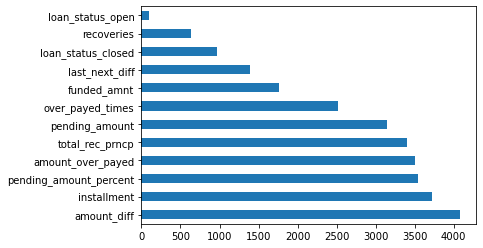

In [341]:
feat_importances = pd.Series(lgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [445]:
lgb = LGBMClassifier(boosting_type='dart',n_estimators=1000)

In [446]:
lgb.fit(X,y)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [402]:
print(classification_report(lgb.predict(X),y))
print(classification_report(lgb.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256676
           1       0.97      0.96      0.96       315

    accuracy                           1.00    256991
   macro avg       0.99      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991



* recall imporoved by .01 percent using 1000 n_estimators

In [406]:
from sklearn.metrics import roc_auc_score,roc_curve

In [407]:
lgb_tr_probs = lgb.predict_proba(X)
lgb_ts_probs = lgb.predict_proba(x_test)

In [408]:
ns_tr_probs = [0 for _ in range(len(y))]
ns_ts_probs = [0 for _ in range(len(y_test))]

In [420]:
lgb_tr_probs = lgb_tr_probs[:, 1]
lgb_ts_probs = lgb_ts_probs[:, 1]

IndexError: too many indices for array

In [411]:
ns_tr_auc = roc_auc_score(y, ns_tr_probs)
lr_tr_auc = roc_auc_score(y, lgb_tr_probs)

In [413]:
ns_fpr, ns_tpr, _ = roc_curve(y, ns_tr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lgb_tr_probs)

In [412]:
import plotly.express as px

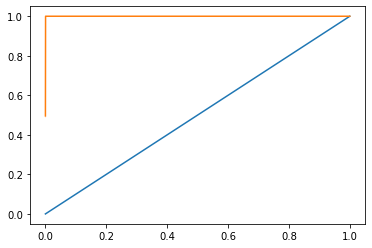

In [418]:
chart=sns.lineplot(ns_fpr,ns_tpr)
chart = sns.lineplot(lr_fpr,lr_tpr)

In [421]:
ns_ts_auc = roc_auc_score(y_test, ns_ts_probs)
lr_ts_auc = roc_auc_score(y_test, lgb_ts_probs)

In [422]:
ns_ts_fpr, ns_ts_tpr, _ = roc_curve(y, ns_tr_probs)
ts_fpr, ts_tpr, _ = roc_curve(y, lgb_tr_probs)

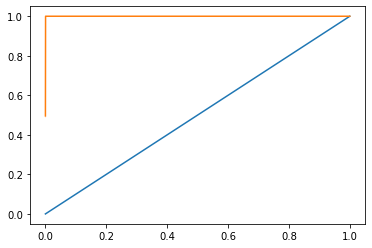

In [423]:
chart=sns.lineplot(ns_ts_fpr,ns_ts_tpr)
chart = sns.lineplot(ts_fpr,ts_tpr)

In [424]:
from sklearn.metrics import roc_auc_score

In [427]:
print(roc_auc_score(y,lgb.predict(X)))
print(roc_auc_score(y_test,lgb.predict(x_test)))

1.0
0.9855052232639687


* model is very stable got good auc_roc_scores

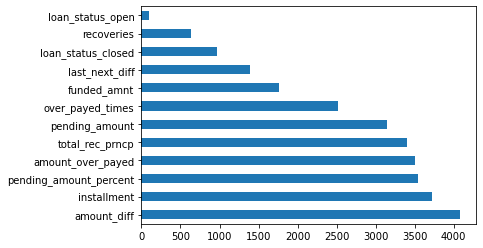

In [432]:
feat_importances = pd.Series(lgb.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

# undestaning feature importance

* amount_diff is the colum made from differnce of pending amount and amount_over_payed
 * most of the people who dont to get default tending to pay loan installment before they get deafult
 * if there is low difference between pending amount and amount_over_payed then they will not be default else they will be default
* installment may be a factor
* pending_amunt_percent is the amount that remaing to be paid in precentage
 * it  between loan amount funded and amount recoved from customer
* amount over payed ie., difference between a installment and last_payment_amount
* over_payed_times it how times did customer pay avove the base installment amount
* funded_amount it the amount funded to customer

In [452]:
from sklearn.externals import joblib 

C:\Users\samal\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [453]:
# Save the model as a pickle in a file 
joblib.dump(lgb, 'lgb.pkl') 


['lgb.pkl']

In [433]:
import lightgbm as lightgbm

In [454]:
tree=lightgbm.create_tree_digraph(lgb)

In [458]:
import matplotlib.pyplot as plt

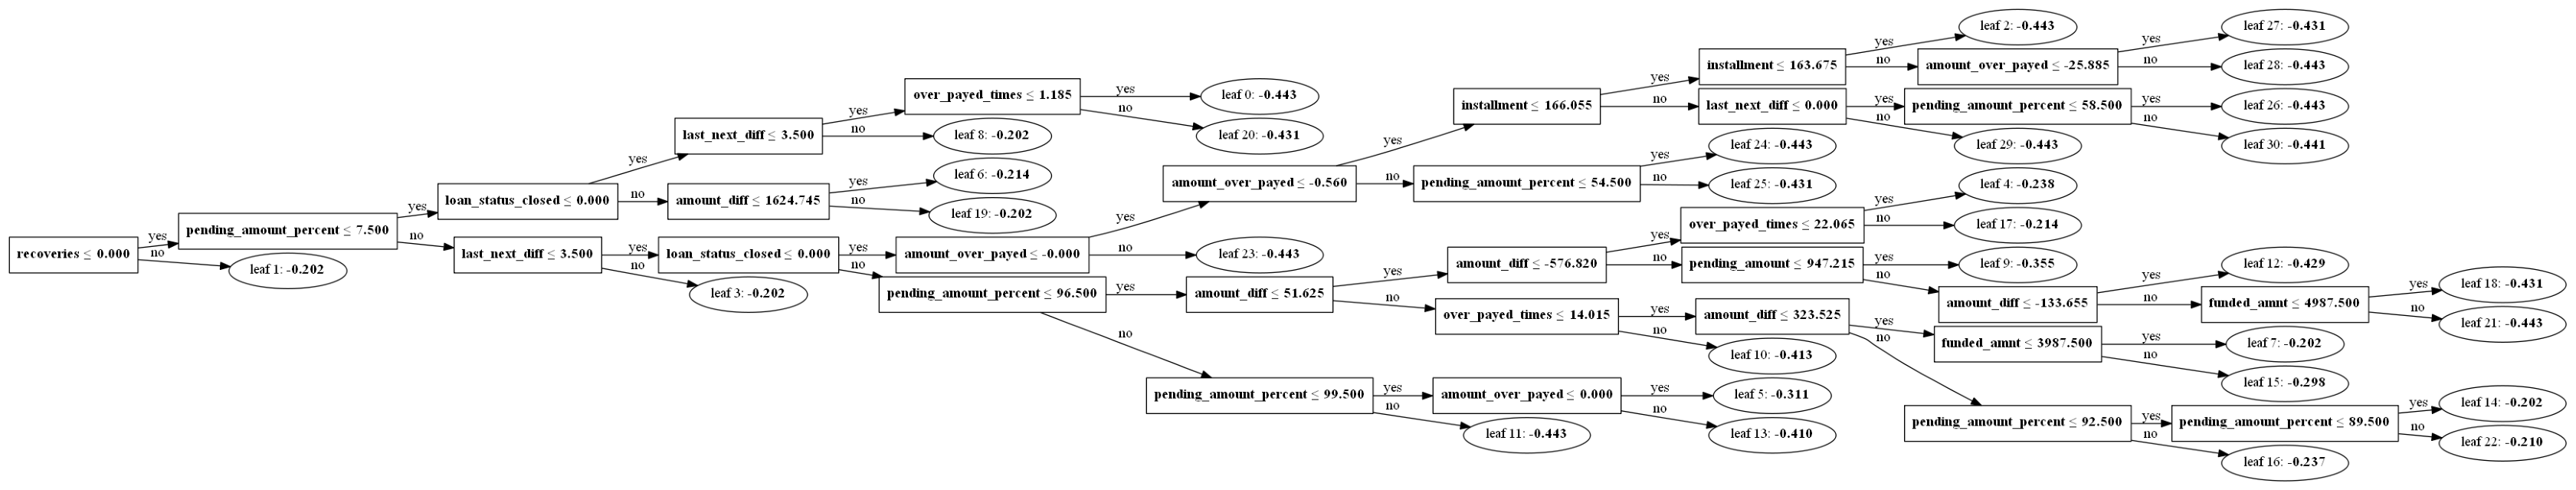

In [465]:
lightgbm.plot_tree(lgb2,figsize=(60,60))

* iterpetaion of tree 

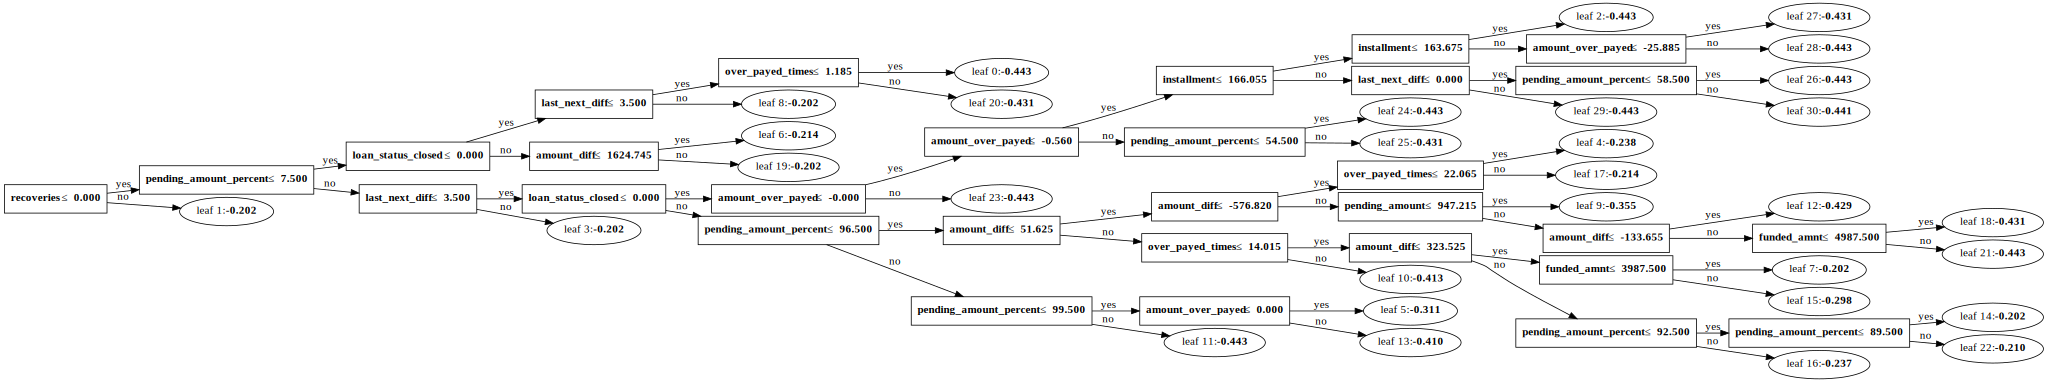

In [466]:
tree